# Final Project PCA Testing

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy.optimize import minimize
import sklearn.linear_model as lm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

## Breast Cancer Analysis

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df

In [ ]:
df.isnull().sum()

Remove Unnamed column and worst/standard error measurements

In [ ]:
df_means = df.drop(columns=['Unnamed: 32', 'radius_se', 'texture_se', 'perimeter_se',
                      'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
                      'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
                      'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
                      'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 
                      'symmetry_worst', 'fractal_dimension_worst'])
df_means

Make df with standard error

In [ ]:
df_se = df.drop(columns=['Unnamed: 32', 'radius_mean', 'texture_mean', 'perimeter_mean',
                      'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                      'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                      'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
                      'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 
                      'symmetry_worst', 'fractal_dimension_worst'])
df_se

Change diagnosis column to 1s and 0s for malignant and benign, respectively

In [ ]:
# diagnosis column
df_means['diagnosis'] = np.where(df_means['diagnosis'] == 'M', 1, 0)
df_means

### Check distribution of data

Checking Standard Error

In [ ]:
measurements_long = (
    df_se
    .drop(columns = ['diagnosis', 'id'])
    .melt(var_name='type', value_name='measurement')
)

measurements_grid = sns.FacetGrid(
    data = measurements_long,
    col = 'type',
    col_wrap = 3,
    sharex = False
)

measurements_grid.map(sns.histplot, 'measurement');


Checking Mean

radius_mean                 3.022413
texture_mean                4.265280
perimeter_mean             20.650587
area_mean                 282.135640
smoothness_mean             0.013239
compactness_mean            0.043222
concavity_mean              0.060906
concave points_mean         0.032269
symmetry_mean               0.025376
fractal_dimension_mean      0.005878
dtype: float64


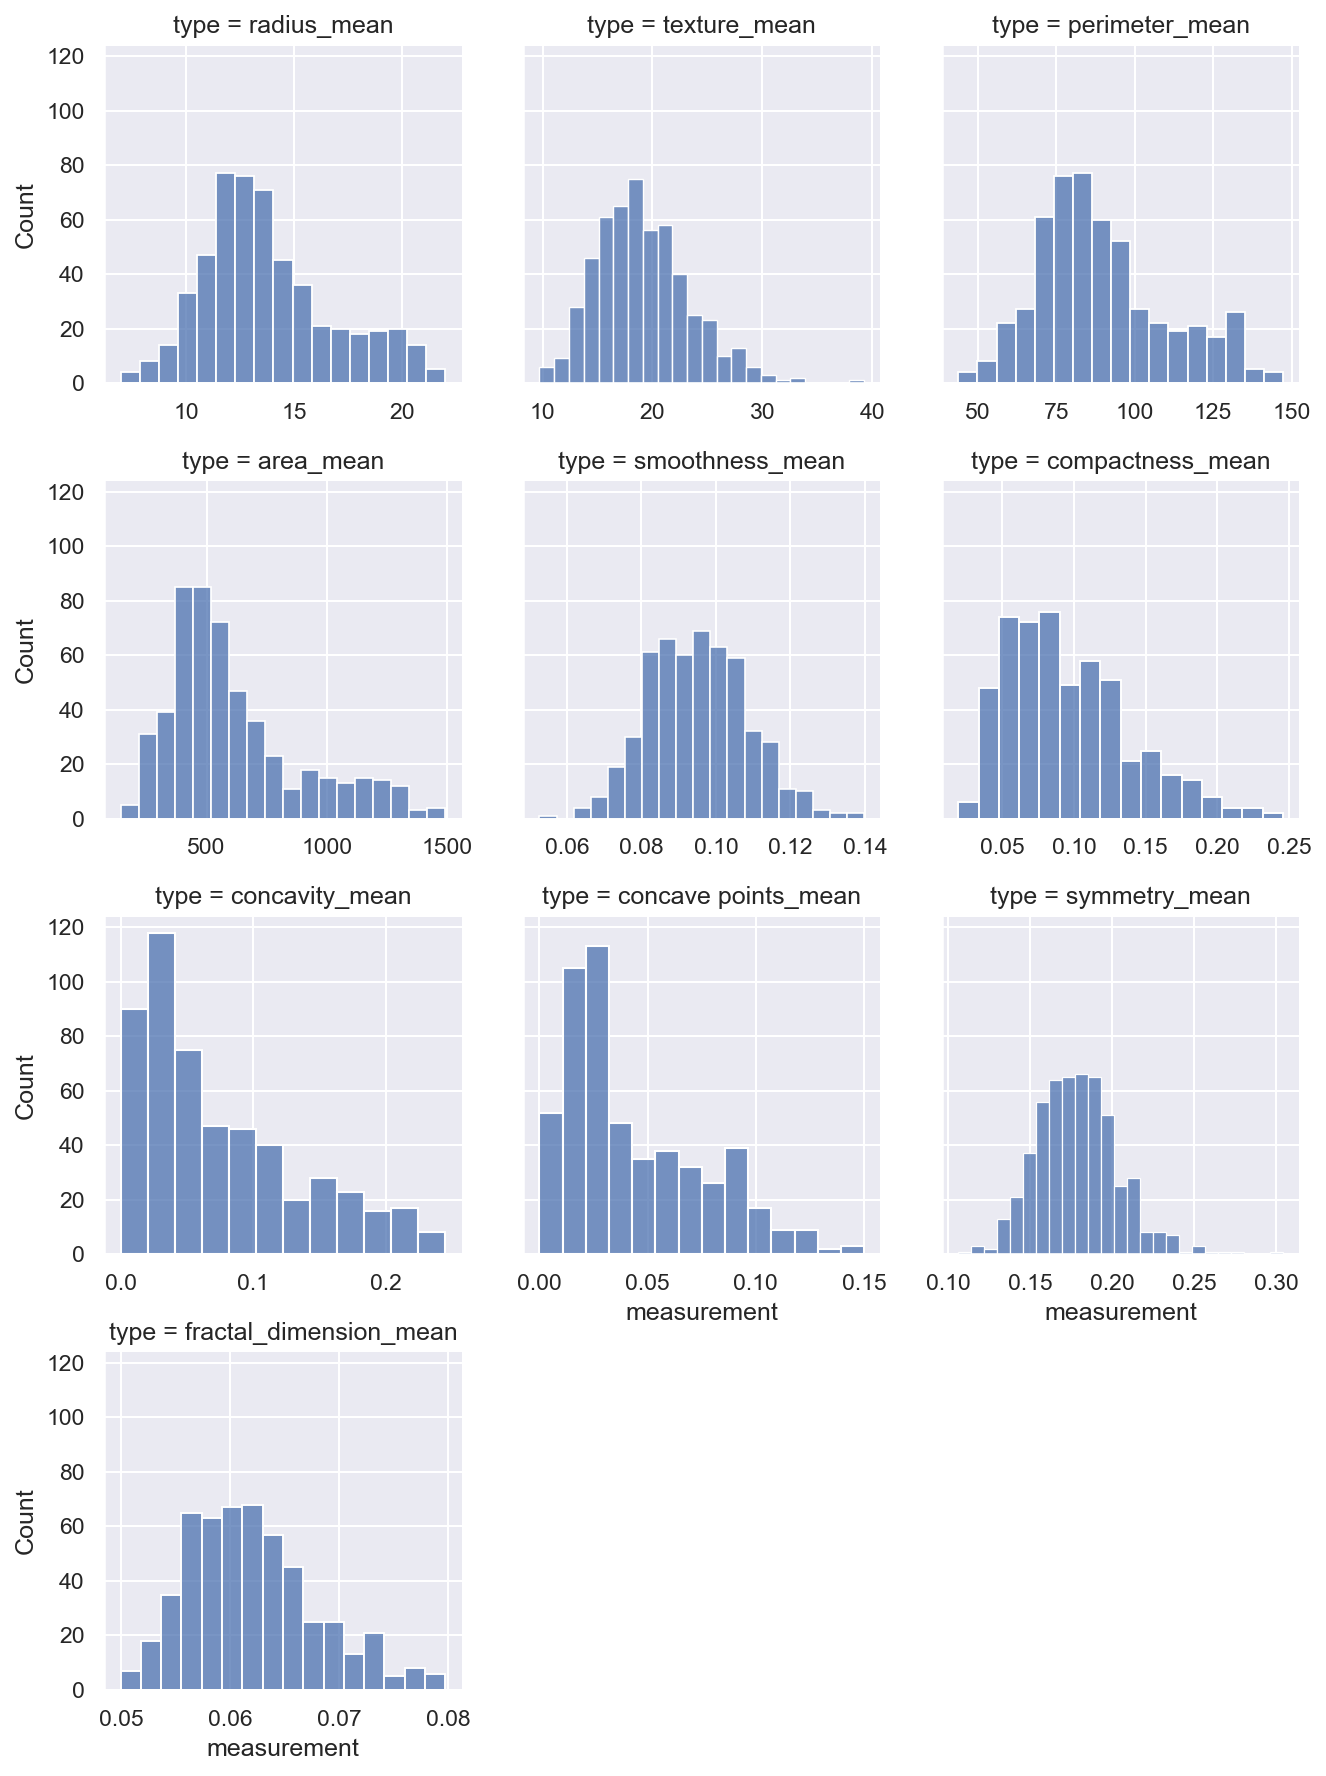

In [191]:
measurements_long = (
    df_means
    .drop(columns = ['diagnosis', 'id'])
    .melt(var_name='type', value_name='measurement')
)

measurements_grid = sns.FacetGrid(
    data = measurements_long,
    col = 'type',
    col_wrap = 3,
    sharex = False
)

measurements_grid.map(sns.histplot, 'measurement');
print(df_means.drop(columns = ['diagnosis', 'id']).std())

Trying to remove outliers

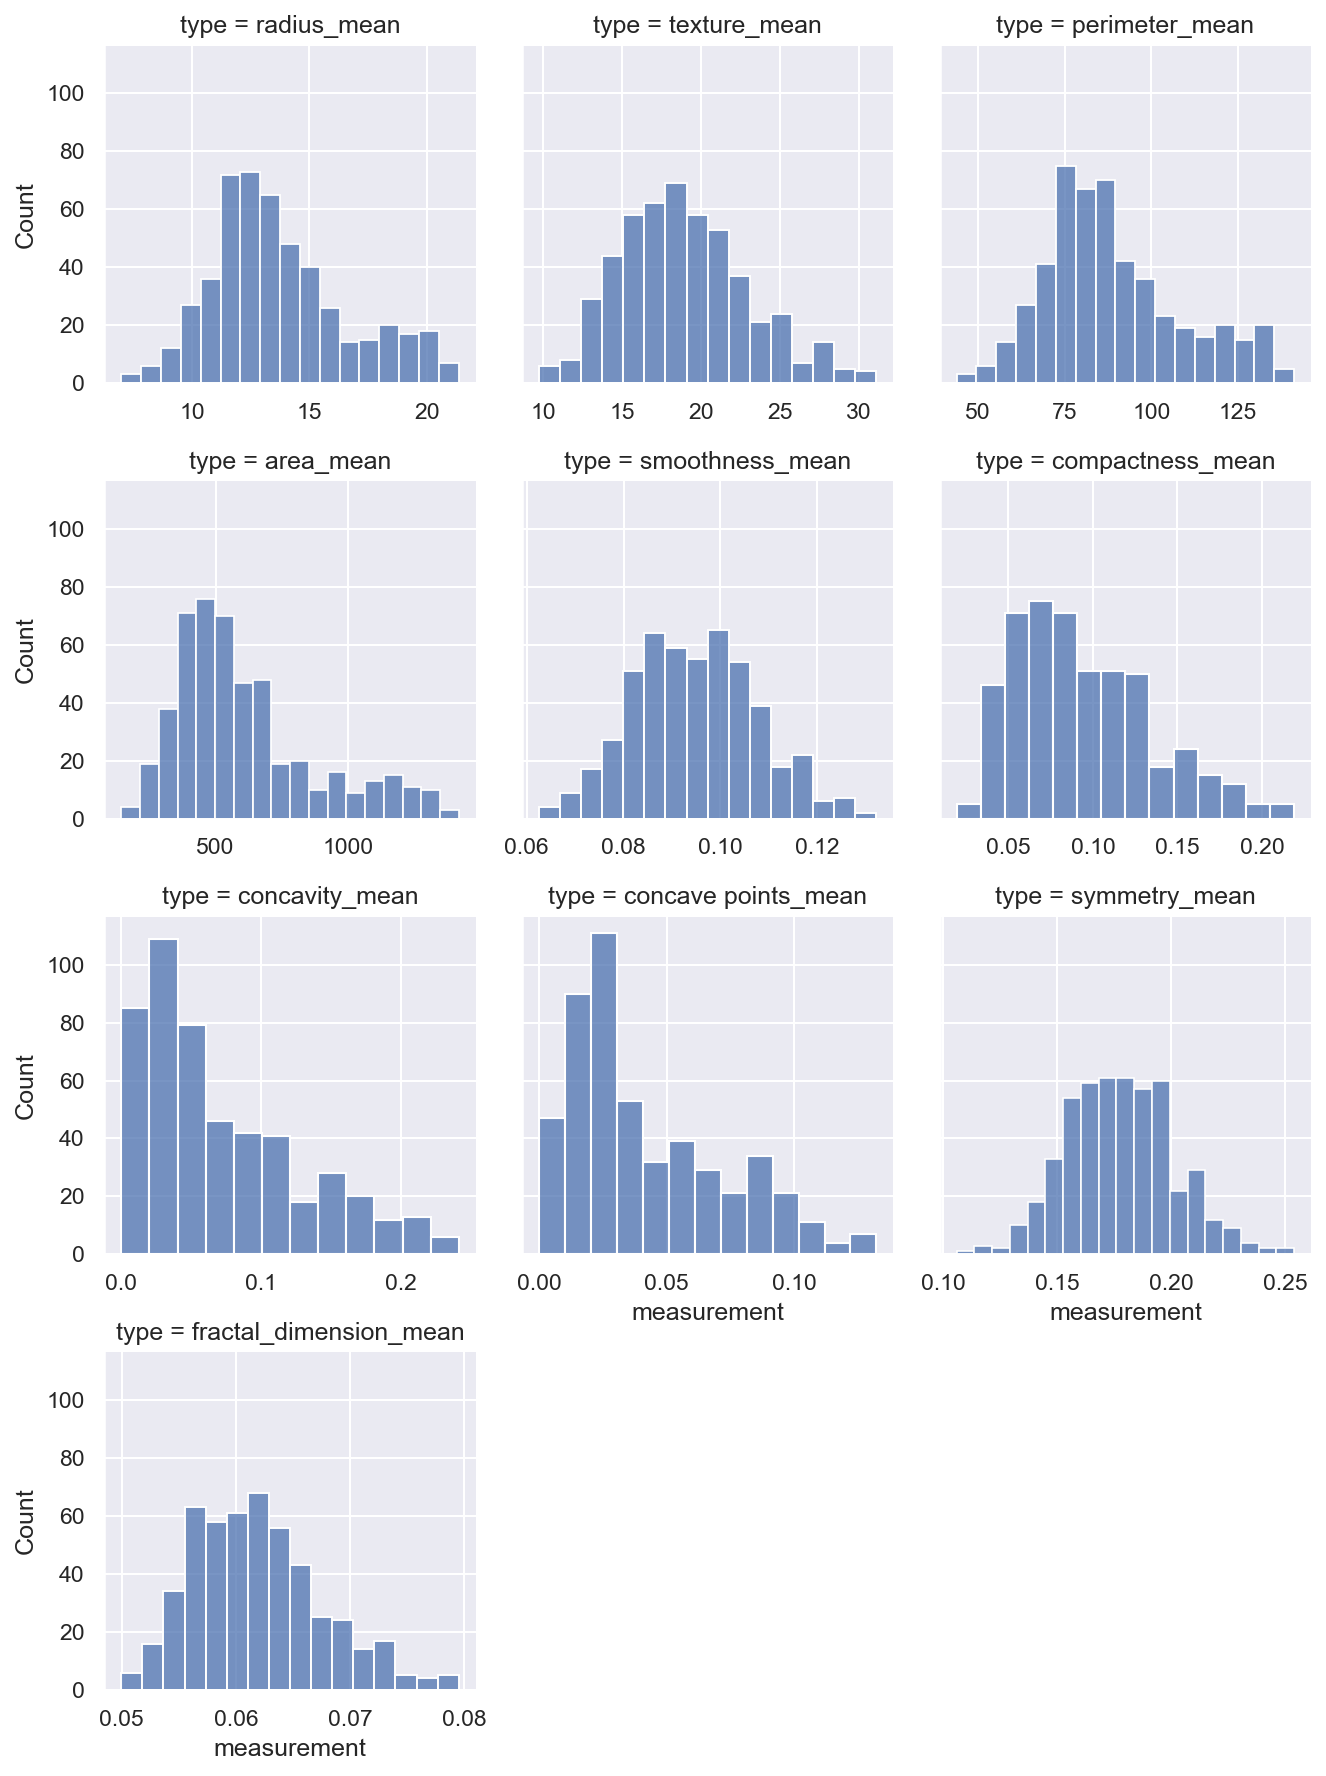

In [198]:
# df_means = df_means.drop(df_means[df_means['radius_mean'] >= 24].index)
# print("After removing radius outliers:", df_means.shape)

# df_means = df_means.drop(df_means[df_means['concavity_mean'] >= 0.25].index)
# print("After removing concavity outliers:", df_means.shape)

# df_means = df_means.drop(df_means[df_means['fractal_dimension_mean'] >= 0.08].index)
# print("After removing fractal dimension outliers:", df_means.shape)

# df_means = df_means.drop(df_means[df_means['compactness_mean'] >= 0.25].index)
# print("After removing compactness outliers:", df_means.shape)

# df_means = df_means.drop(df_means[df_means['area_mean'] >= 1500].index)
# print("After removing area outliers:", df_means.shape)


df_means = df_means[(np.abs(stats.zscore(df_means)) < 3).all(axis=1)]

df_means
measurements_long = (
    df_means
    .drop(columns = ['diagnosis', 'id'])
    .melt(var_name='type', value_name='measurement')
)

measurements_grid = sns.FacetGrid(
    data = measurements_long,
    col = 'type',
    col_wrap = 3,
    sharex = False
)

measurements_grid.map(sns.histplot, 'measurement');
#print(df_means.drop(columns = ['diagnosis', 'id']).std())

In [200]:
df_means.shape

(499, 12)

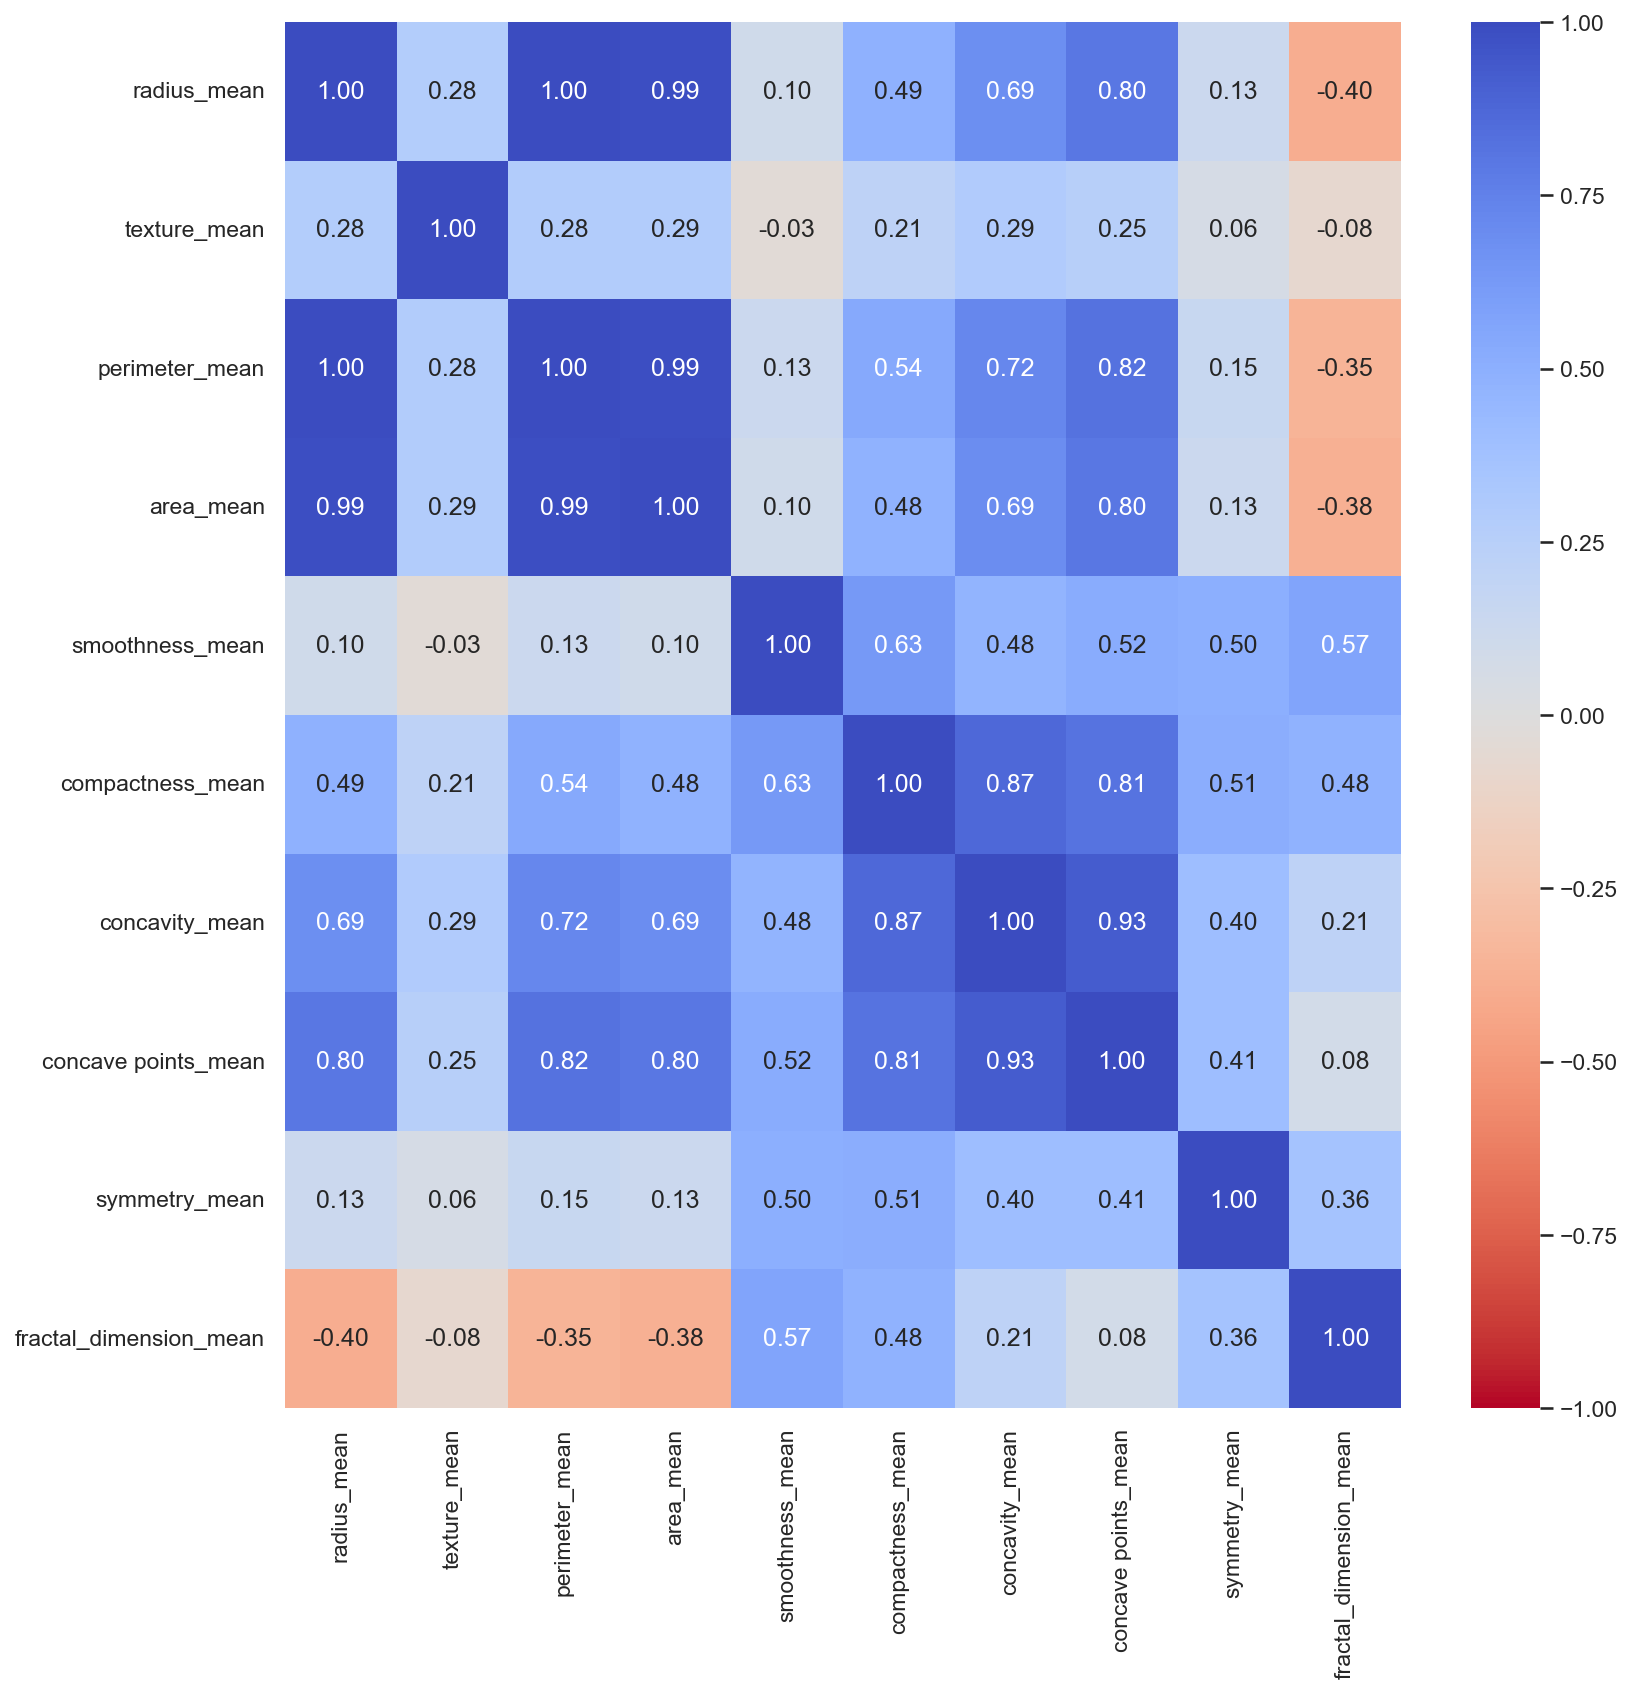

In [202]:
plt.figure(figsize = (12, 12))
sns.heatmap(
    df_means.drop(columns = ['diagnosis', 'id']).corr(),
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm_r',
    vmin = -1, 
    vmax = 1
);

## Scatterplot Matrix

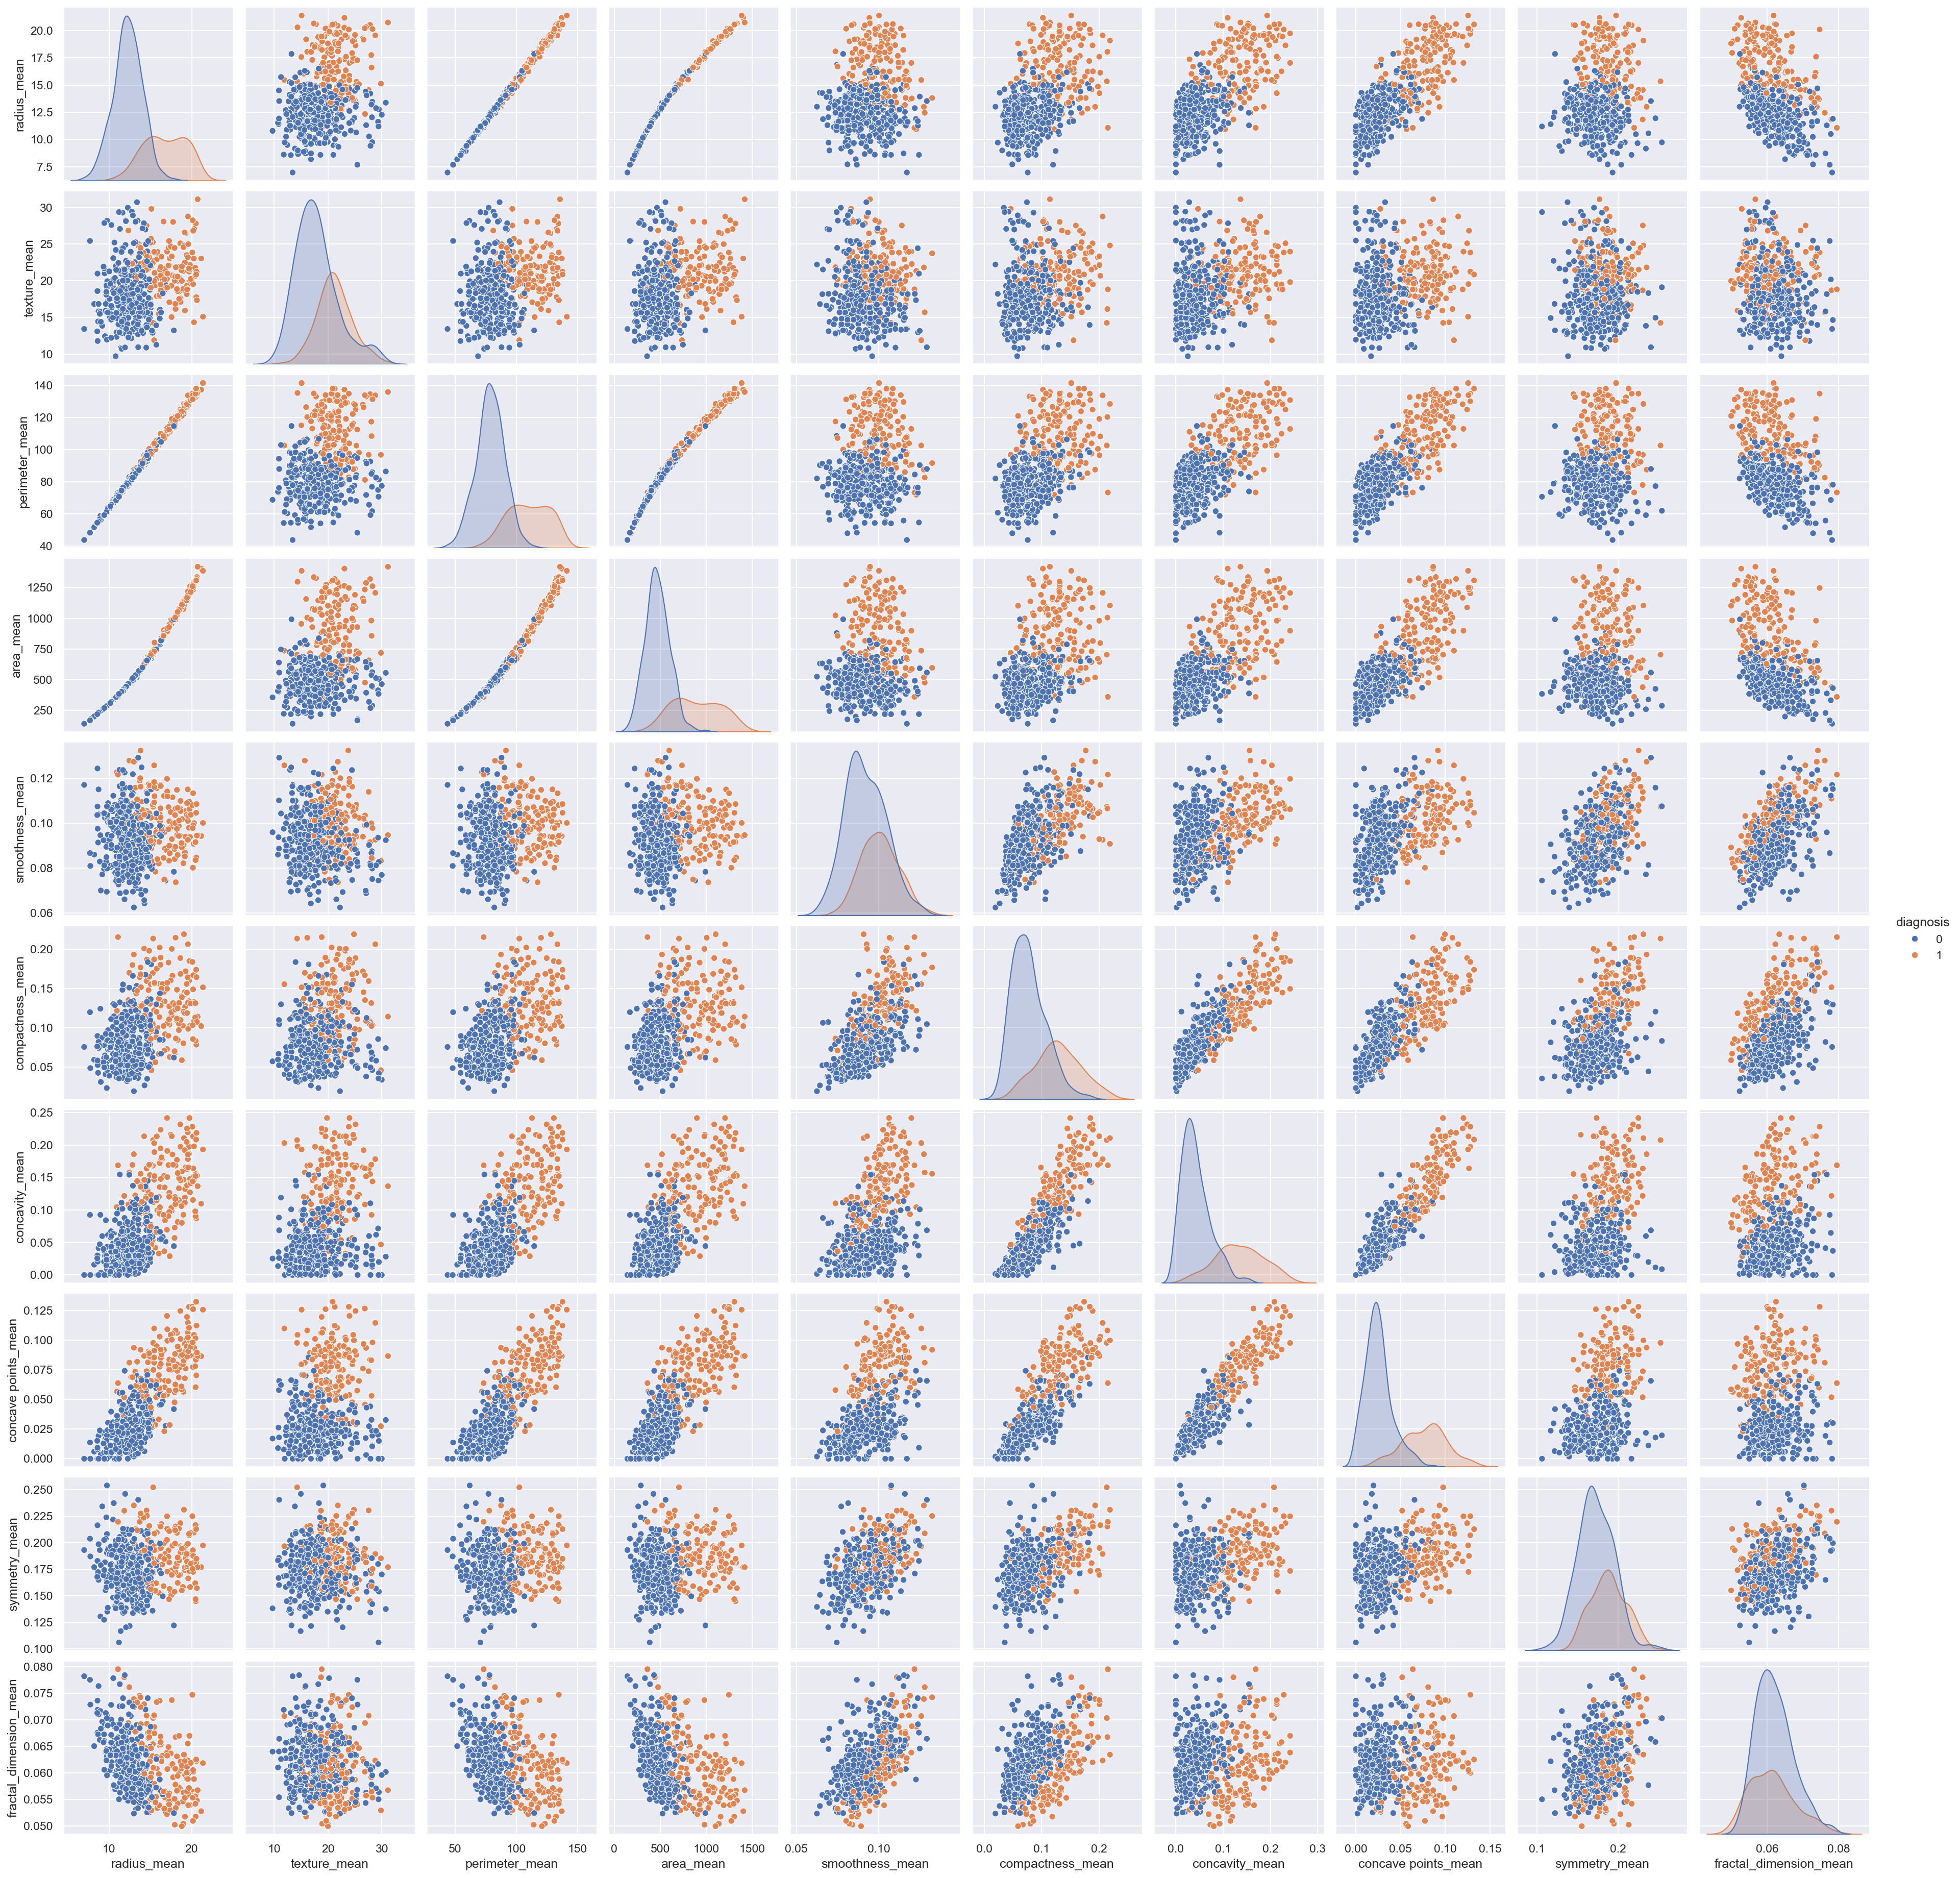

In [209]:
sns.pairplot(
    df_means.drop(columns = 'id'),
    hue = 'diagnosis'
);